In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [0]:
from sklearn.datasets import make_moons

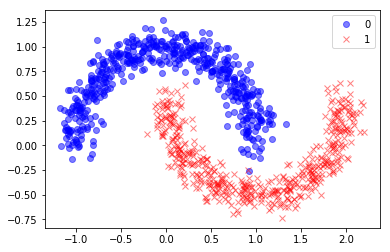

In [0]:
x, y = make_moons(n_samples=1000, noise=0.1, random_state=0)
plt.plot(x[y==0, 0], x[y==0, 1], 'ob', alpha=0.5)
plt.plot(x[y==1, 0], x[y==1, 1], 'xr', alpha=0.5)
plt.legend(['0', '1'])

In [13]:
x.shape

(1000, 2)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [0]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD

In [0]:
model = Sequential()
model.add(Dense(1, input_shape=(2,), activation='sigmoid'))
model.compile(Adam(lr=0.05),'binary_crossentropy', metrics=['accuracy'])

In [20]:
model.fit(x_train, y_train, epochs=200, verbose=0)

In [21]:
result = model.evaluate(x_test, y_test)

300/300 [==============================] - 0s 194us/step


In [22]:
result # binatry crossentropy , accuracy score

[0.31719428837299346, 0.8466666674613953]

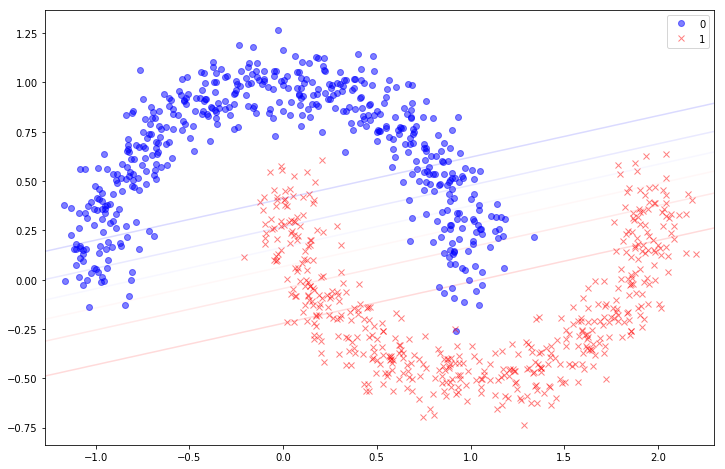

In [25]:
def plot_decision_boundary(model, x, y):
  amin, bmin = x.min(axis=0) - 0.1
  amax, bmax = x.max(axis=0) + 0.1
  hticks = np.linspace(amin, amax, 101)
  vticks = np.linspace(bmin, bmax, 101)

  aa, bb = np.meshgrid(hticks, vticks)
  ab = np.c_[aa.ravel(), bb.ravel()]

  c = model.predict(ab)
  cc = c.reshape(aa.shape)

  plt.figure(figsize=(12,8))
  plt.contour(aa, bb, cc, cmap='bwr', alpha=0.2)
  plt.plot(x[y==0, 0], x[y==0, 1], 'ob', alpha=0.5)
  plt.plot(x[y==1, 0], x[y==1, 1], 'xr', alpha=0.5)
  plt.legend(['0', '1'])

plot_decision_boundary(model, x, y)

<h2><center>Deep Model (ANN)

In [26]:
model = Sequential()
model.add(Dense(4, input_shape=(2,), activation='tanh')) # 4 nodes in first layer
model.add(Dense(2, activation='tanh'))                   # 2 layer in second hidden layer
model.add(Dense(1, activation='sigmoid'))                # 1 node in output layer
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 12        
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 3         
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])

In [28]:
model.fit(x_train, y_train, epochs=100, verbose=0)

In [29]:
result = model.evaluate(x_test, y_test)
result              # binatry crossentropy , accuracy score

300/300 [==============================] - 0s 244us/step


[0.012381984659004957, 0.9933333333333333]

In [0]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [33]:
y_train_pred = model.predict_classes(x_train)
y_test_pred = model.predict_classes(x_test)

print("Acuuracy on train :\t{:0.3f}".format(accuracy_score(y_train, y_train_pred)))
print("Acuuracy on test :\t{:0.3f}".format(accuracy_score(y_test, y_test_pred)))

Acuuracy on train :	0.999
Acuuracy on test :	0.993


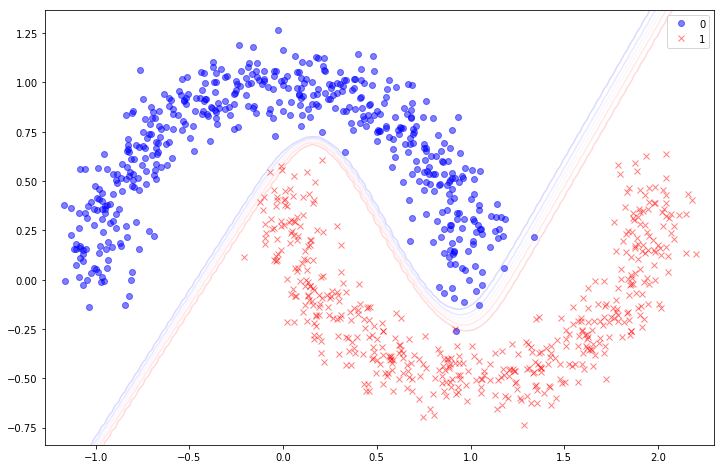

In [34]:
plot_decision_boundary(model, x, y)